<H1>Pythonで確率を学ぶ</H1>

これは、長畑(2009)『Rで学ぶ統計学』共立出版に基づく解説です。<BR>
学習項目です
<UL>
 <LI>事象と確率
 <LI>ベイズの定理
 <LI>確率変数
 <LI>確率分布
</UL>
<H2>事象</H2>
確率論の基本的な用語の説明:
<UL>
  <LI>標本点：さいころを投げた時、起こりうる可能な結果は、１，２，３，４，５，６のいずれかの目が出る、というもの。このような可能な結果のことを<B>標本点</B>といい、標本点の全体の集合を<B>標本空間</B>という。
  <LI>事象: サイコロを一回振って６の目が出るというような、起こりうる事柄を<B>事象</B>という。事象は標本空間の部分集合によって定義される。
  <LI>全事象: 標本点をひとつも含まない事象を<B>空事象</B>、ただひとつの標本点からなる事象を<B>根元事象</B>、 複数の標本点を含む標本空間の部分集合を<B>複合事象</B>、起こりうる事象全体、すなわち標本空間全体を<B>全事象</B>という。空事象を$\emptyset$、全事象を$U$で表す。
  <LI>和事象: 事象$A$と$B$の<B>和事象</B>$A \cup B$ とは、事象Aまたは事象Bのいずれかが起こる、という(複合)事象。サイコロの場合、2回サイコロを振ってどちらかで1の目が出るという事象は、「1回めに1の目がでる」事象と「2回めに1の目がでる」事象の和事象
  <LI>積事象: 事象$A$と$B$の<B>積事象</B>$A \cap B$ とは、事象Aまたは事象Bのどちらもが起こる、という(複合)事象。サイコロの場合、2回サイコロを振ってどちらも1の目が出るという事象は、「1回めに1の目がでる」事象と「2回めに1の目がでる」事象の積事象
  <LI>余事象: 「事象$A$が起こらない」という事象$\neg A$（$A^C$とも書く）を、事象$A$の<B>余事象</B>という。サイコロの場合、「１の目が出る」の余事象は、「１の目が出ない」、つまり全事象から「１の目が出る」事象を除いたものとなる
  <LI>排反: 事象AとBが互いに同時に起こりえないとき、事象Aと事象Bが<B>排反</B>である、という。このとき$A \cap B = \emptyset$となる。
</UL>


<H2>確率</H2>
事象に基づいて確率が定義される。事象(仮に$A$で表す)が起こる確からしさを定量的に、0から1の間の数値で表したものを事象$A$の(起こる)確率 $P(A)$ と表す。これは、次の性質を満たすものとする:
<B>確率の公理</B>(コロモゴロフによる)<UL>
   <LI> どの事象Aに対しても、$0 \leq P(A)\leq 1$
   <LI> 全事象Uに対し、 $P(U)=1$
   <LI>互いに排反な事象$A_1, A_2, \cdots, A_n$に対し、事象$A_1, A_2, \cdots, A_n$のいずれかが起こる和事象$\cup^n_{i=1}A_i$に対し、以下が成り立つ: <CENTER>$P(\cup^n_{i=1}A_i)= \Sigma_{i=1}^n P(A_i)$</CENTER>
</UL>
このことから、次の性質が導かれる:<UL>
    <LI>加法定理：$P(A \cup B) = P(A) + P(B) - P(A \cap B) $
    <LI>$P(\neg A) = P(U) - P(A) = 1 - P(A)$
    <LI>事象$A$のもとでの事象$B$の<B>条件付き確率</B> $P(B |A)$ : 事象$A$が起こった(もしくは事象$A$が起こったという情報がある)という条件のもとで事象$B$が起こった確率。$P(A \cap B) = P(A)P(B | A) = P(B) P(A | B)$が成り立つ<BR>
注意: この式はいつも成り立つ。これと対照的に(間違って覚えている人が多い) $P(A \cap B) = P(A)P(B)$ は<B>一般には成り立たない</B>。言い換えれば、一般には $P(A|B) \neq P(A), P(B|A) \neq P(B)$である。
    <LI>事象Aと事象Bが<B>独立</B>: 事象Aが起きても起きなくても事象Bが起こる確率に変わりがないとき(その逆も)。このときは、$P(A|B) = P(A), P(B|A) = P(B)$ が成り立つので、$P(A \cap B) = P(A)P(B)$ となる

 </UL>

<H4>演習問題1-1</H4>
（頭の準備のための問題) ６面体のサイコロにおいて、インチキでないサイコロでは１の目がでる確率が1/6であることを示しなさい。また、そのサイコロを２回振って最初の出目をx, 二回目の出目をy としたとき、$x+y \leq 6$となる確率を求めなさい。

15

<H4>演習問題1-2</H4>
乱数を用いて、通常の６面体のサイコロにおいて、１の目がでる確率が1/6となるかどうか、確かめてみよう。 サイコロを600回、6000回、60000回、600000回ふったときに1の目がでる回数を乱数を用いてシミュレーションし、それぞれで１の目がでる確率が1/6に近いかどうかを調べてみよう。

In [6]:
# ヒント
# 一様乱数を発生させる関数はrandomモジュールのrandit関数。 
# これを使って、次のようにすれば、100回のサイコロ振りをシミュレーションできる。
import numpy.random as random
trial = [random.randint(1,6) for _ in range(100)]
#この結果、変数trialには1,2,3,4,5,6のいずれかの数、合計100個の数を要素とするリストが値になる。
# そこで、1の目の出現回数を求めれば良い


<H4>演習問題1-3</H4>
事象AとBに対し、次の式が成り立つことを示せ:
<CENTER>$P(B | A) = \frac{ P(B) P(A|B) }{ P(A) } $</CENTER>
ヒント: 事象AとBの積事象が成り立つ確率について述べた次の式を使う: $P(A \cap B) = P(A)P(B | A) = P(B) P(A|B)$

答

<H4>演習問題1-4</H4>
形状も重さも同じである赤球と白玉がそれぞれ50個ずつある箱から目をつぶって一個取り出してそれが赤球である確率はいくらか。 次に、赤球を10個だけ入れた箱を3箱、赤球10個と白球10個を入れた箱を1箱、赤球10個と白球40個を入れた箱を1箱、合計5箱用意したとする。 そして、まず目をつぶって箱を選び、そこから目をつぶって玉を一個取り出し、それが赤球であった場合の確率を求めよ。そして、 先の操作での答と値が違うことを確認せよ。 最初の操作と次の操作では共に赤球と白玉は50個ずつであったが、どうして2回の操作で確率が異なるのか、説明せよ。

<H2>ベイズの定理</H2>
<B>全確率の定理</B>: 互いに排反な事象 $E_1, E_2, \cdots, E_n$ (すなわち、$i \neq j$であるすべての$i,j$ ($1 \leq i,j \leq n$)に対し、 $E_i \cap E_j emptyset$、$E_1 \cup E_2 \cup \cdots \cup E_n = U$ )と、任意の事象$A$に対して次式が成立する:
<CENTER>$P(A) = P(E_1)P(A | E_1) + P(E_2)P(A | E_2) + \cdots + P(E_n)P(A | E_n) = \sum^n_{i=1} P(E_i)P(A |E_i)$</CENTER>
<P>
<B>ベイズの定理(Bayes theorem)</B>: <BR>
        $\begin{array}{ll}  P(E_i | A) & = \frac{P(E_i \cup A)}{P(A)}=\frac{P(A|E_i)P(E_i)}{P(A)} 
                   =\frac{P(A|E_i)P(E_i)}{P(E_1)P(A | E_1) + P(E_2)P(A | E_2) + \cdots + P(E_n)P(A | E_n)}\\
                   & =\frac{P(A|E_i)P(E_i)}{\sum_{i=1}^n P(E_i)P(A |E_i)}\\
                   \end{array}$
<P>
ベイズの定理に関する用語:
<UL>
  <LI>事前確率(prior probability, 無条件確率): $P(E_1), P(E_2), \cdots $ : 事象Aが観測される前(事前)に与えられているため、事前確率という
  <LI>事後確率(posterior probability): $P(E_1|A), P(E_2|A), \cdots$ （条件付き確率）: 事象Aが起こった後(事後)の確率であることから
  </UL>

<h4>演習問題2-1</h4>
ある病気に罹患しているかどうか検査において、「（ある人が）陽性反応が出る」という事象をAとし、「（その人が）実際に罹患している」という事象をEとする。 そして、確率が次のように与えられているとする: $P(A \mid E)=0.56, P(A \mid \neg E) = 0.04, P(E)=0.035 $<BR>
この時、検査で陽性反応である確率と、陽性反応が出た時に実際に病気を発病する確率をそれぞれ求めよ。<P>

[ヒント]
求める確率は、$P(A)$ と $P(E \mid A)$ 。全確率の定理から $P(A) = P(A \mid E)P(E) + P(A \mid \neg E)P(\neg E)$。 またベイズの定理から、
$P(E \mid A)= \frac{P(A \mid E) P(E)}{P(A)}$である。
なお、仮定から、$P(\neg A \mid E)=0.44,P(\neg A \mid\neg E)=0.96, P(\neg E)=0.965$ である。

In [1]:
# 計算用


<h4>演習問題2-2</h4>
とある適性検査で、（ある人が）適性と判定される事象をTとし、（その人が）実際に適性があるという事象をEとする。
$P(E)=0.60, P(T\mid E)=0.80, P(T\mid \neg E)=0.040$のとき、 ある人が適性と判定され、かつ実際に適性である事象の確率を求めよ。<BR>
[ヒント]
求めたいのは、「適性と判定される」事象と、「実際に適性である」事象の積事象である。つまり$P(T \cap E)$を求める。

In [2]:
# 計算用


<h4>演習問題2-3</h4>
三種類の物体(仮にA,B,C とする) の認識ができるカメラ機構を備えているロボットがある。 ロボットは、Aの物体を認識した場合には赤色のLEDを、Bの物体を認識した場合は緑色のLED を、C の物体を認識したら青のLED を点滅させる。 ただし、ロボットのカメラ機構は故障することがあり、故障した場合もロボットは赤色のLEDを点滅させる。 そして故障する事前確率はp = 0.01 である。<BR>
ここで3 種類の物体の中からN 個をランダムに選び、次々にロボットに提示した。すると、すべてロボットは赤色のLED を点滅させた。N = 1の場合、N=2の場合、… N=10の場合、それぞれの場合に対し、ロボットのカメラ機構が壊れている確率を求めよ。 <P>
[ヒント]
ロボットのセンサーが壊れているという事象をR, i個目の物体を提示したときに赤色のLEDが点滅する事象を$L_i$とする。 すると、問題文から、(その他に情報がない場合の確率は「事前」確率): $P(R)=0.01$<BR>
これにより、ロボットのセンサーが壊れていない(事前)確率$P(\neg R)$は$1-P(R)=0.99$となる。<BR>
ここで、$P(L_i|R)$の意味を考えると、 「ロボットのセンサーが壊れている」という状況のもとで「i番目の赤色LEDが 点滅するという(事後)確率であり、これは常に1である。また $P(L_i|\neg R)$の意味を考えると、 「ロボットのセンサーが壊れていない」という状況のもとで 「i番目の赤色LEDが点滅するという(事後)確率であり、 これは各$L_i$が独立事象なら、その値は1/3である。 これらを前提として問題を解く。<BR>
N=1 の場合: このとき赤色のLEDが点滅した(という情報がある)のだから、 $P(R|L_1)$が求めるべき(「赤色のLEDが点滅した」という情報が得られた後の確率なので、「事後」)確率である。<BR>
ベイズ則から,$ P(R|L_1)=\frac{P(L_1| R)P(R)}{P(L_1)}$、 また全確率の定理から、
$P(L_1) = P(L_1 | R)P(R) +P(L_1|\neg R)P(\neg R)$ である。よって、0.029 (有効数字２桁)となる。<BR>
N=2のときは、$L_1, L_2$という二つの事象を考えると、 求めるべきものは$P(R|L_1 \cap L_2)$ である。 ベイズ則より、 $P(R|L_1\cap L_2)=\frac{P(L_1 \cap L_2|R)P(R)}{P(L_1\cap L_2)}$<BR>
ここで、$P(L_1 \cap L_2)$の値は また全確率の定理を用いて$P(L_1 \cap L_2|R)P(R) + P(L_1 \cap L_2|\neg R)P(\neg R)$により求められる。
それ以外の Nの値の場合については、以上の考えを適用してば答えることができる。

In [3]:
# 計算用


<h2>確率変数と確率分布</h2>
<UL>
    <LI>確率変数(random variable): 実数の値を取る変数$X$の値が確率に基づくとき、$X$を確率変数という。 そして、実際に取る値のことを実現値という<BR>
例: サイコロを投げて出る目を表す変数は確率変数で、その実現値は$1,2,3,4,5,6$の$6$通りある。
    <LI>離散(計数)型確率変数: サイコロの目のように飛び飛びの値をとる確率変数
    <LI>連続(計量)型確率変数: 身長や体重のように連続した値を取る確率変数
    <LI>確率分布: (離散型)確率変数の実現値を$x_1, x_2, \cdots, x_n$、 それぞれの確率を$p_1, p_2, \cdots ,p_n$とすると、${p_i, i=1,\cdots, n}$を確率分布という
    <LI>分布関数 $F(x)$: 確率変数$X$の実現値が$x$以下である確率が以下のように書かれるときの$f(x)$
        $$P(X \leq x) = F(x) = \left\{ \begin{array}{ll} \Sigma_{x_i \leq x} P(X=x_i) = \Sigma_{x_i < x} p_i & (Xが離散型)\\
                                               \int^{x}_{-\infty}f(x)dx & (Xが連続型) \end{array} \right. $$ 
    
特に$X$が離散型確率変数の場合 $P(X=x_i)=p_i$ を<B>確率質量関数</B>(p.m.f, probability mass function)、もしくは単に<B>確率関数</B>(p.f., probability function)、 $X$が連続型確率変数の場合(分布関数の定義に現れる) $f(x)$を<B>確率密度関数</B>(p.d.f., probability density function)という(注. 大文字の$F$が分布関数、小文字の$f$が密度関数)。詳しくは次回述べる。
    </UL>

参考: 連続型確率変数の実現値と確率について<P>
<QUOTE>
『サイコロを振って出た目』を確率変数とみなすと、サイコロを振って出た目は1,2,3,4,5,6という飛び飛びの『実現値』を取る(例えば、3.5という値にはならない)ので、これは離散型確率変数と言われる。
それに対し、人の体重や身長を確率変数とみなすと、体重の場合0kgから300kgの間の値、身長なら0cmから300cmの間の値（連続した値）をとるので連続型確率変数と言って、離散型確率変数とは別の扱いになる。<BR>
ここで、離散型確率変数の場合、確率変数をX、その実現値をx<sub>i</sub>で表すと、確率関数はp(X=x<sub>i</sub>)と書ける。ところが、連続型確率変数の場合、確率変数をX、その実現値をx<sub>i</sub>で表すとしても、確率変数Xが実現値xをとる確率はp(X=x<sub>i</sub>)とは書けない。このことについて腑に落ちない人のためにここで説明する。<P>
身長を確率変数とみなそう。するとクラスには実現値170cmの者がいるだろう。50人のクラスで10人がそうだとすれば「適当にクラスから人を選んでその身長が170cmである確率は10/50 = 0.20 」と言いたくなるかもしれない。しかしこれは次のような誤解と混同がある。<P>
まず「誰かの身長がちょうど170cm」という値をとる確率はほとんど0である、という事実を指摘しておこう。なぜなら、170cmという値はどこかで『丸め』を行って得られた値だからである。計測器がcm刻みであったか、mm（ミリメートル）刻みであったか、μm（マイクロメートル）刻みか、nn(ナノメートル)刻みか、。。。ということを考えれば、cm刻みなら170cmということはありそうだが、nn刻みの場合、170cmちょうどいう値が得られるのはほとんど可能性がない、ということは容易に理解できよう。<P>
つまり、我々が日常的に使っている「身長が170cmちょうど」というのは実は（例えば)169.5cmから170.5cmの範囲にある」ことの言い換えになっているのである。連続的に値を取る身長に対して確率のようなものを与える関数を<font color="orange">確率密度関数</font>($f(x)$で表す)といい、連続型の確率変数の場合、ある値の幅の区間で定積分したもの（つまり、確率変数の実現値が<font color="green">ある幅の値の範囲に入る</font>可能性）が確率となるのである。ちなみに先の例でいえば、$f(x)$を区間[169.5, 170.5]の間で定積分した値が0.20 となる。<P>
なお、身長をcm刻みで表示することにすれば、飛び飛びの値を取ることになり、この場合は「離散型確率変数」として扱われる。
</QUOTE>

分布関数と確率関数(密度関数)をグラフに書くと:

|離散型：上段: 確率関数、下段:分布関数|連続型: 上段: 密度関数, 下段: 分布関数|
|:---:|:----:|
|![離散型確率変数](http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/RP-1.png)|![連続型密度関数](http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/RP-3.png)|
|![離散型分布関数](http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/RP-2.png)|![連続型分布関数](http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/RP-4.png)|

分布関数$F(x)$について次が成り立つ
<OL>
    <LI>$F(x)$は単調非減少
    <LI>$\lim_{x \rightarrow -\infty}F(x)=0$, $\lim_{x \rightarrow \infty}F(x)=1$,
    <LI>$F(x)$は右連続な関数:  $\lim_{x \rightarrow a+0}F(x)=F(a)$,
</OL>
確率関数(密度関数)$f(x)$について次が成り立つ
<OL>
    <LI>離散型: $p_{x_i} \geq 0 $　　　　   連続型: $f(x)\geq 0$
    <LI>離散型: $\Sigma p_{x_i} =1$ 　　　　連続型: $\int_{-\infty}^\infty f(x)=1$
    </OL>

<H4>演習問題3-1</H4>
裏表のあるコイン2枚を投げたときに、表の出る枚数の確率関数と分布関数を求めよ。ただし表か裏のどちらかになるものとする。 <BR>
[ヒント]
裏表のあるコイン2枚を投げたとき、表が出る枚数を確率変数Xとする。 Xの実現値は0, 1, 2 の3通りであり、離散型の確率変数である。 確率関数 $P(X=x)$において、$x \neq 0,1,2$の場合は $P(X=x)=0$ は明らか。 そこで、$P(X=0), P(X=1), P(X=2)$の値を求めれば良い。
例えば$P(X=0)$の値は、二枚とも裏の場合の確率なので、 1/2 * 1/2 = 1/4 = 0.25 と求められる。
<P>
分布関数は、$P(X < 0)、P(X \leq 0)、P(X < 1)、 P(X \leq 1), P(X < 2)、P(X \leq 2), P (X < \infty)$ を求めれば良い。<BR>明らかに $P(X < 0) = 0, P(X \leq 0) = P(X < 1), P(X \leq 1) = P(X<2),  P(X \leq 2)=P(X < \infty) = 1.0$である。

In [4]:
# 計算用


<H4>演習問題3-2</H4>

関数$f(x)$を、 $0 < x$　または $\pi < x$ のとき$f(x ) = 0$、
$0 \leq x \leq \pi$ のとき $f(x) = \frac{1}{2}\sin(x)$ とする。
<P>
<UL>
 <LI> $f(x )$が確率密度関数の性質(1)と(2)を満たすことを示せ。
 <LI> $f(x )$を確率密度関数としたときの分布関数を表示せよ。
</UL>
[ヒント]
確率関数の性質(1)とは、$0 \leq f(x )$
性質(2)は、区間$[-\infty , +\infty]$ における$f(x )$の(定)積分が 1 になることである。 どちらも示すのは容易であろう。<P>
分布関数$F(x)$は、$x < 0$ のとき$F(x)=0、 0 \leq x \leq \pi $のときは、区間 $[0, x]$ における$f(x)$の定積分と等しく、 $\pi < x$ のときは$F(x)=1$である。これを表示すれば良い。<BR>
確率関数の性質(1)とは、$0 \leq f(x)$<BR>
性質(2)は、区間$[-\infty , +\infty]$ における$f(x)$の(定)積分が 1 になることである。
どちらも示すのは容易であろう。<BR>
![分布関数](http://lang.sist.chukyo-u.ac.jp/Classes/PythonProbStat/Figs/AnsExProb3-2.png)
分布関数$F(x)$は、$0 \leq x$のとき$F(x)=0$、
$0 \leq x \leq \pi$ のときは、区間 $[0, x]$ における$f(x)$の定積分と等しく、
 $\pi< x$ のときは$F(x)=1$である。これを表示すれば良い。

In [ ]:
# 解答用

確率変数Xが分布$F(x)$に従う確率変数であることを、$X \sim F(x)$と表す
<UL>
<LI> 期待値$E(X)$: 確率変数 $X$ の取る値とその確率の積の総和。(算術)平均、もしくは加重平均ともいう （<FONT color="red">注</FONT>: 「平均」にはこれ以外に幾何平均や調和平均などがあるが、これらは期待値(=算術平均)とは別のもの)式で書くと:
      $$E(X) = \left\{ \begin{array}{ll}
                      \Sigma_{i=1}^n x_i P(X = x_i) = \Sigma_{i=1}^n x_i p(x_i) & 離散型\\
                      \int^{\infty}_{-\infty} x f(x) dx & 連続型\\
                  \end{array} \right. $$
 $x$の関数を$h(x)$とするとき、$h(X)$の期待値は以下で定義される:
    $$E(X) = \left\{ \begin{array}{ll}
                      \sum_{i=1}^n h(x_i) P(X = x_i) = \sum_{i=1}^n h(x_i) p(x_i) & 離散型\\
                      \int^{\infty}_{-\infty} h(x) f(x) dx & 連続型\\
                  \end{array} \right. $$
<LI>分散V(X): 確率変数Xの取る値と期待 値との差の二乗の総和の期待値。式で表すと $E( (X - E(X))^2)$

$$V(X) = E( (X - E(X))^2) = \left\{ \begin{array}{ll}
                      \Sigma_{i=1}^n (x_i -E(X))^2 P(X = x_i)  & 離散型\\
                      \int^{\infty}_{-\infty} (x - E(X))^2 f(x) dx & 連続型\\
                  \end{array} \right. $$

  <UL>
      <LI>期待値の性質: $a, b$を定数とすると、 $E(aX + b) = aE(X)+b$
      <LI>分散の性質: <BR> $\begin{array}{l}
             V(X) = E(X^2) - {E(X)}^2  \\
             V(aX + b) = a^2 V(X)\\
        \end{array}$
  </UL>
<LI>k次モーメント<UL>
   <LI> Xの原点周りの$k$次モーメント: $\alpha_k = E(X^k) = \int x^k f(x) dx　　　 ( 離散型 = \Sigma_i x_i^k p(x_i))$
   <LI>Xの平均$\mu$周りの$k$次モーメント: <BR>
    $\mu_k = E(X - \mu)^k = \int (x-\mu)^k f(x)dx 　　　　　　( 離散型 = \Sigma_i (x_i - \mu )^k p(x_i))$
    </UL>
<LI>Xの積率母関数(モーメント母関数): 期待値、分散などを統一的に扱える関数<BR>
    $M(\theta) = E[e^{\theta X}] =  \left\{ \begin{array}{ll}
                      \Sigma_{x} e^{\theta x}f(x)  & 離散型\\
                      \int  e^{\theta x}f(x) dx & 連続型\\
                  \end{array} \right.$
</UL>

<h4>演習問題4-1</h4>
期待値の性質の式:
「a, bを定数とすると、 $E(aX + b) = aE(X)+b $」
が成り立つことを示せ。

答:

<h4>演習問題4-2</h4>

分散の性質の式 
「a, bを定数とすると、 　$V(X) = E(X^2) - {E(X)}^2$、および$ V(aX + b) = a^2V(X)$」
が成り立つことを示せ。(ヒント: $E(X)$が定数であることを用いる)

答:

<h4>演習問題4-3</h4>
$X$と$Y$が独立ならば、$V(X+Y)=V(X)+V(Y)$となることを示せ。(<FONT color="red">注意</FONT>: 演習問題4-2からは、$V(X+X)=V(2X)=4V(X)$となる。この結果とこの演習問題が矛盾しないのは$V(X+X)$の計算において$X$同士は独立ではないからである。なお、「$X$と$Y$が独立ならば$E(XY)=E(X)E(Y)$ および $E(X+Y)=E(X)+E(Y)$が成り立つ」ことを使っても良いこととする。）

答<BR>


<h3>大数の法則</h3>
個別に見るとランダムな値が出るものでも、その値をたくさん集めて平均を取ると、ある一定の数になるという現象があります。たとえばさいころを1回振ってみると、その出目は１から６までのどの目が出るかは決まりません。それをPythonでシミュレーションしてみましょう。以下で用いる乱数生成関数random.randintは「一様乱数」を生成する関数(一様分布に基づいて乱数を生成する関数)で、前に紹介したものです。

In [3]:
import numpy.random as random
print(random.randint(1,6)) # 1から6までの整数を一様乱数で生成

1


ところがサイクロを20回ほど振って平均を求めれば、大抵の場合3.5前後の結果になります。

In [29]:
trial20 = [random.randint(1,6) for _ in range(20)]
print(trial20)
# 出目のリスト
print("mean = %f" % (sum(trial20)/20.0))

[4, 4, 6, 1, 6, 4, 4, 6, 6, 5, 4, 4, 3, 1, 4, 2, 3, 5, 1, 2]
mean = 3.750000


ここで、それぞれの目が現れた回数を<B>度数</B>といい、これを棒グラフで表したものを<B>ヒストグラム</B>と言います。 ヒストグラムはmatplotlibを用いて表すことができます。

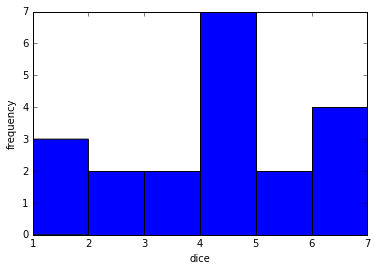

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
# 出目の出現回数
plt.hist(trial20,bins=6,range=(1,7))   # 出目をx軸に、出現回数をy軸にして表示する, bins=棒の数、range=x軸の範囲
plt.xlabel('dice')  # ラベルに日本語は使えないと思って良い
plt.ylabel('frequency')

さらにさいころを振る回数をふやしてみましょう。そうすると、どんどん3.5に近づくことがわかります。このようにたくさんの値をとって平均するとほぼ一定値に近づく、というこの性質は、一見ランダムな値をとるものの性質を解析する手がかりになるといえるでしょう。

     200 times trial :    3.510
    2000 times trial :    3.512
   20000 times trial :    3.499
  200000 times trial :    3.497


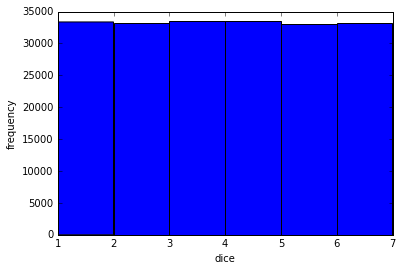

In [39]:
for i in [200, 2000, 20000, 200000]:
    trials=[random.randint(1,6) for _ in range(i)]
    print("%8d times trial : %8.3f" % (i,sum(trials)/(1.0*i)))

# 最後の結果のヒストグラムを表示
plt.hist(trials,bins=6,range=(1,7))   # 出目をx軸に、出現回数をy軸にして表示する, bins=棒の数、range=x軸の範囲
plt.xlabel('dice')  # ラベルに日本語は使えないと思って良い
plt.ylabel('frequency')
plt.show()

<h4>独立同一分布(i. i. d.)</h4>
前項では、「さいころを20回振る」などと簡単に書いてしまいましたが、厳密なことを言えば、それぞれ「さいころを振」って出る目が同じ分布をするか、ということは怪しい物があります。同じさいころを振った場合は「同じ分布」をするでしょうが、違うさいころの場合には、本当に「同じ分布」をするかどうか、問題になることがあります。
<P>
このように、確率変数$X_1, X_2, \ldots, X_n$が
<UL>
    <LI>個々の分布（周辺分布）はどれも同じ
    <LI>しかも、すべて独立
</UL>
であることが大事なことが多いのです。この条件を満たすとき、これらの確率変数は<B>独立同一分布</B>に従うといい、i.i.d. (independent and identically disctributed)と略します。

<h4>大数の法則</h4>
独立同一分布に従う(i.i.d.な）確率変数$X_1, X_2, \ldots, X_n$がどれも期待値$\mu$, 分散$\sigma^2$であるとすると、その平均$Z_n$<BR>
 $$ Z_n = \frac{X_1 + \cdots + X_n}{n}$$
 を求めると、<BR>
 $$ E[Z_n] = E[ \frac{X_1 + \cdots + X_n}{n} ] = \frac{E[X_1 + \cdots + X_n]}{n} = \frac{E[X_1]+\cdots+E[X_n]}{n} = \frac{n\mu}{n} = \mu$$
 $$ V[Z_n] = V[ \frac{X_1 + \cdots + X_n}{n} ] = \frac{V[X_1 + \cdots + X_n]}{n^2} = \frac{V[X_1]+\cdots+V[X_n]}{n^2} = \frac{n\sigma^2}{n^2} = \frac{\sigma^2}{n}$$
 となります。つまり期待値は元の期待値と同じで、分散は元の$\frac{1}{n}$となります。<BR>
 ということは、もしも$n$をどんどん大きくしていけば、分散$V[Z_n] \rightarrow 0$となるわけです。<P>
 つまり、個数$n$を無限に増やせば、平均$Z_n$は$\mu$に収束するということになります。これを<B>大数の法則</B>と呼びます。
 <P>
 ここで元の分布がどのようなものでも、これが成り立つということに注意しましょう。ですから、さいころのシミュレーションにおいて、一様分布に従う乱数を発生させ、さいころを振る回数をどんどん増やすと、その平均が期待値の3.5にどんどん近づいていった、というのはこの大数の法則の現れとみなせます。

<h4>演習問題5-1</h4>
先の例ではさいころを200, 2000, 20000, 200000回と振った時の平均が期待値に近づいていくところをシミュレーションでみた。ここでは「２つのさいころを振ったときの出目の合計」を確率変数とみなそう。まず２つのさいころを振った時の合計について、期待値$\mu$と分散$\sigma^2$の理論値を求めよ。<BR>
次にシミュレーションを用いて、『「2つのさいころの出目の和」100個の平均』の期待値と分散、 『1,000個の平均』の期待値と分散、『10,000個の平均』の期待値と分散を求め、大数の法則がシミュレーションにおいてほぼ成り立つことを確認せよ。ここで『「2つのさいころの出目の和」n個の平均の期待値/分散』は、『「2つのさいころの出目の和」n個』を100個作り、その平均/分散で近似せよ。

In [5]:
# 演習問題の解答用
import numpy as np


## 二項分布
離散型確率変数$X=0, 1, 2, \cdots, n$について、確率変数$P_k$が次式で表される確率分布を二項分布とよび、$B(n,p)$で表す:
$P_k = P(X=k) = {}_nC_k p^k q^{n-k} $   ($k=0, 1, \cdots, n, 0<p<1, p+q=1$)

以下はやらなくてもよいが、ぜひチャレンジしてみよう

**練習問題6-1**  
均等に目が出るサイコロ(六面体)を10回ふって、$k$回だけ2以下の目が出る確率を求めよ

**練習問題6-2** 
確率変数$X$の期待値と分散が次式で表されることを$e^{\theta x}$のマクローリン展開を用いて示せ。
* 期待値$\mu = E[X] = M'(0)$ 　　(ここで$M'(0)$はモーメント母関数の$\theta$による微分に$\theta=0$を与えたもの)
* 分散$\sigma^2 = E[X^2]-E[X]^2 = M''(0) - M'(0)^2$   (ここで $M''(0)$はモーメント母関数の$\theta$による2階微分に$\theta=0$を与えたもの)

**練習問題6-3** 
二項分布$B(n,p)$の期待値が$\mu=np$、分散が$\sigma^2=npq$であることを示せ。

### 参考: マクローリン展開
関数$f(x)$が$x=0$の近傍で無限回微分可能で，次の右辺の級数が収束するとき
$$f(x)=f(0)+\frac{f’(0)}{1!}x+\frac{f”(0)}{2!}x^2+\cdots+\frac{f^{(n−1)}(0)}{(n−1)!}x^{n−1}+\cdots$$
が成り立つ．
　この定理をマクローリンの定理といい，右辺の展開式をマクローリン展開という．（これは，テイラーの定理，テイラー展開を$x=0$の近傍に適用したものとなっている．） 

特に$e^x$のマクローリン展開は重要

$$e^{x}=1+\frac{1}{1!}x+\frac{1}{2!}x^2+\cdots+\frac{1}{(n−1)!}x^{n−1}+\cdots$$